In [1]:
import numpy as np # get the "numpy" library for linear algebra
import matplotlib.pyplot as plt # for plotting
import importlib

import my_simple_net as simple_net

In [2]:
# the function we want to have (desired outcome)
def coord_to_color(x0, x1, pixel_image):

    Npixels = np.shape(pixel_image)[0]
    
    # convert to integer coordinates (assuming input is 0..1)
    x0int=(x0*Npixels*0.9999).astype(dtype='int')
    x1int=(x1*Npixels*0.9999).astype(dtype='int')
    
    return(pixel_image[x0int,x1int]) # extract color values at these pixels

# pick 'batchsize' random positions in the 2D square
def make_batch(batchsize, image):

    inputs  = np.random.uniform(low=0.0, high=1.0, size=[batchsize,2])
    targets = np.zeros([batchsize,1]) # must have right dimensions
    targets[:,0] = coord_to_color(inputs[:,0], inputs[:,1], image)
    
    return(inputs, targets)

In [61]:
# the function we want to have (desired outcome)
def myFunc(x0,x1, pixel_image):
    r2=x0**2+x1**2
    return(np.exp(-5*r2)*abs(x1+x0))


# pick 'batchsize' random positions in the 2D square
def make_batch(batchsize, image):

    inputs  = np.random.uniform(low=-0.5, high=0.5, size=[batchsize,2])
    targets = np.zeros([batchsize,1]) # must have right dimensions
    targets[:,0] = coord_to_color(inputs[:,0], inputs[:,1], image)
    
    return(inputs, targets)

In [3]:
importlib.reload(simple_net)

sn = simple_net.SimpleNN(LayerSizes=[2,150, 150, 100, 1], batchsize = 1000)
#sn = simple_net.SimpleNN(LayerSizes=[2,30,30,30,30,1], batchsize = 1000)

In [4]:
#image   = plt.imread('Noreen2.png')
image   = plt.imread('smiley_default.png')
image   = image[:,:,0]
image -= image.min()
image  = (image.astype(dtype='float'))/image.max() # normalize between 0 and 1!

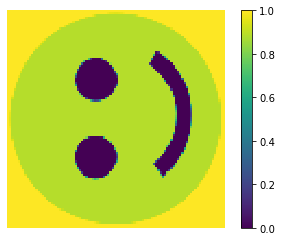

In [5]:
# check that this works:
Npixels_Test=100 # do the test output on a low-res grid! (saves time)
xrange=np.linspace(0,1,Npixels_Test)
X0, X1 = np.meshgrid(xrange, xrange)
plt.imshow(coord_to_color(X0, X1, image), interpolation='nearest',origin='lower')
plt.axis('off')
plt.colorbar()
plt.show()

/home/user/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


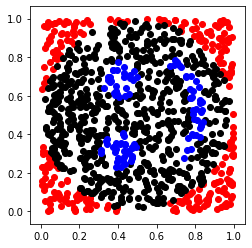

In [6]:
y_in, y_target = make_batch(sn.batchsize, image)
y_target = y_target.flatten()

X = y_in.T[0]
Y = y_in.T[1]

X1 = X[y_target >= 0.95]
Y1 = Y[y_target >= 0.95]

X2 = X[(y_target >= 0.05) & (y_target < 0.95)]
Y2 = Y[(y_target >= 0.05) & (y_target < 0.95)]

X3 = X[y_target < 0.05]
Y3 = Y[y_target < 0.05]

plt.scatter(x = X1, y = Y1, color = 'red')
plt.scatter(x = X2, y = Y2, color = 'black')
plt.scatter(x = X3, y = Y3, color = 'blue')

plt.axes().set_aspect('equal')
plt.show()

In [ ]:
sn.reset_weights()
sn.reset_memory()

# Now: the training! (and plot the cost function)
eta=.1
batches=3
costs=np.zeros(batches)

for k in range(batches):
    y_in, y_target = make_batch(sn.batchsize, image)
    costs[k] = sn.train_net(y_in, y_target, eta)
    print(sn.y_layer[-1])

plt.plot(costs)
plt.show()

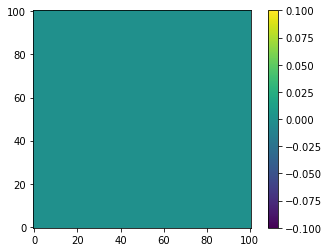

In [101]:
# a 'test' batch that includes all the points on the image grid
Npixels_Test = 101

test_batchsize=Npixels_Test**2
testsample=np.zeros([test_batchsize, 2])
xrange=np.linspace(0, 1, Npixels_Test)
X0, X1 = np.meshgrid(xrange, xrange)

testsample[:,0]=X0.flatten()
testsample[:,1]=X1.flatten()

# show the output of this net
testoutput = sn.apply_net_simple(testsample)

myim=plt.imshow(np.reshape(testoutput, np.shape(X0)),origin='lower',interpolation='none')
plt.colorbar()
plt.show()

In [105]:
importlib.reload(simple_net)
sn.apply_net_simple(testsample)

array([[     0.        ],
       [  1317.88465578],
       [  2635.76931156],
       ...,
       [257546.48955927],
       [258864.37421505],
       [260182.25887083]])

In [90]:
sn.Weights[-1]
sn.y_layer[3]

array([[-0.00000000e+00,  8.43391984e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  2.81007374e-02],
       [-0.00000000e+00,  8.49324359e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  2.39695607e-02],
       [-0.00000000e+00,  8.55256734e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  1.98383839e-02],
       ...,
       [-0.00000000e+00,  2.24722879e+01, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  1.11921957e+00],
       [-0.00000000e+00,  2.25292821e+01, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  1.11713954e+00],
       [-0.00000000e+00,  2.25862762e+01, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  1.11505950e+00]])

In [93]:
a = np.dot(sn.y_layer[3], sn.Weights[-1]) + sn.Biases[-1]
sum(a>0)

array([0])